# Analysing the "Big 5" European Football Leagues
<br>
By Adil Moazzam

| Assignment title      | Analysing the "Big 5" European Football Leagues |
| --------------------- | ----------------------- |
| Level                 | 7 (Postgraduate)        |
| Course name           | MSc Business Analytics  |
| Module code           | MN5813                  |
| Module tutor          | Alex Reppel             |
| Assignment number     | 2 _(Individual assignment)_|
| Candidate number      | 2503682                 |

## Introduction

Since the inception of structured national football leagues in Europe around the late nineteenth to early twentieth century, for ensuing decades fans have indulged in the age-old debate of, "Which league is the best?". A dynamic quandary, which shifts depending on the priorities of pundits and fans alike. While the issue is subjective by nature, this report looks to dive into tangible and well-documented variables that serve as metrics to what makes these leagues great, in an attempt to deduce which truly is the best football league in Europe.

This report analyses data obtained from the website “https://fbref.com” of the league tables and player wages from the top five European leagues for the seasons 2019/2020 through to 2023/2024. The leagues considered in this report are the Premier League (England), La Liga (Spain), Serie A (Italy), the Bundesliga (Germany), and Ligue 1 (France).

These leagues have been chosen as they are widely regarded as the top leagues in Europe, and only the past five seasons have been considered, due to the fact that this report aims to deduce the best league in Europe for the present day, as such recency of data is paramount.
 
The objectives of this project are to: <br>
1.	Establish factors pertaining to league position, and compare these for all five leagues. <br>
2.	Deduce requirements to win each league in terms of points and goals. <br>
3.	Investigate trends in player wage spending across all five leagues. <br>
 
The data set used for this project has been web scraped from the aforementioned website under the “fair use” or “fair dealing” law, pertaining to its academic and non-commercial purpose. This data is publicly available; however, it is copyright protected and the intellectual property of the respective leagues. The scraping, use, and publication of this report are for academic purposes and in no way behave as a substitute or lead to a revenue loss of the original intellectual property holders. Furthermore, this report is to be used for non-commercial purposes only [1] [2] [3] [4]. Moreover, the data set used in this report has been scraped in accordance with “fbref” own policy, which states that no more than 10 requests can be sent within a minute [5].

## Executive Summary

This report analyses data from fbref.com to compare the top five European football leagues (Premier League, La Liga, Serie A, Bundesliga, Ligue 1) across various metrics for the 2019/2020 to 2023/2024 seasons. The goal is to utilise web scraping, data cleaning, and visualisations to identify the strongest league based on factors like attendance, competitiveness, difficulty of winning, and finances.

**Key Findings**

Attendance and Popularity: The Premier League and Bundesliga boast the highest average attendance, likely due to their global reach and large stadium capacities. <br>

Competitiveness: The Premier League and La Liga require the most points to win, but the number of matches played per league makes this an imperfect comparison. The Premier League has the highest points-per-match requirement to win, possibly influenced by Pep Guardiola's tactical approach.<br>

Finances: La Liga, Ligue 1, and Bundesliga show significant disparity in player wages between teams, raising questions about their competitiveness. The Premier League requires the highest player wages to win, likely due to its overall financial wealth.

**Conclusion**

Considering the analysed factors, the Premier League and Bundesliga emerge as the strongest European leagues currently, with the Premier League holding a slight edge across most metrics.

## Use of Generative AI

In this project, generative AI has been used to find relevant Python libraries and functions, learn how to utilise them, and decode error messages.

## Setup

### How to run this report

If you are viewing this report as a pdf file, the executable file is available via the following link.

Link to repository: https://github.com/AdilM2404/Big-5-Leagues-Analysis

**Important! in order for this file to run successfully, the Beautiful Soup library will need to be installed.** Documentation on how to achieve this can be found on the following link: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-beautiful-soup

## Libraries

Whilst it is possible to import the libraries as and when needed, it is preferrable to import them in one location at the beginning, as this makes them easier to manage and avoids duplication of effort. This cell can be added to and rerun as required.

In [1]:
# Libraries for Web scraping
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Libraries to Load Data
import pandas as pd

# For visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Management

The aim of this section is to firstly obtain data from the "fbref" website through the use of web scraping, merge the individual data sets together, and then clean that data to make it suitable to use for analysis and visualisations.

Objectives for this section:

1. Web scrape data using the "Beautiful Soup" library.

2. Merge the data sets using "Pandas.".

3. Remove redundant columns.

4. Change column names for clarity.

5. Clean each column for usability.

6. Eliminate null values.

7. Convert column data types such that they are appropriate for analysis.

### Web Scraping

Web scraping was the preferred method to acquire data, as there were no easily accessible datasets that met the project's needs.

The data was obtained from the "fbref" website as it offers all the information on all five leagues of interest in one location, a feature lacking in other sources offering the same information. Secondly, the aforementioned website is well known for being a reliable source of football data. Lastly, an inspection of the HTML code revealed that the website appeared to be web scrape friendly, which is supported by the inclusion of web scraping guidelines.

#### Extracting the League Tables

The league tables of the big five European leagues from 2019–2020 to 2023–2024 are extracted and combined in the following cell. First, a list of URLs that matched the specified seasons was created. The code iterates through the links for each URL, sending a "get" request to retrieve the webpage's HTML content. The first table on each page is found and transformed into a data frame using the "Beautiful Soup" library. The year that the corresponding season ends is then included in a new column called "Season," which is appended to the data frame. This is taken straight from the text of the URL. After adding a data frame for each season to a list, all of the data frames are then concatenated into a single dataset. The resulting dataset is exported as a CSV file labelled "big_5_league_tables_2019_to_2024.csv".

In [2]:
# List of URLs
urls = [
    "https://fbref.com/en/comps/Big5/2019-2020/2019-2020-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2020-2021/2020-2021-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2021-2022/2021-2022-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2022-2023/2022-2023-Big-5-European-Leagues-Stats",
    "https://fbref.com/en/comps/Big5/2023-2024/2023-2024-Big-5-European-Leagues-Stats"
]

# Create an empty list to store data frames
dataframes = []

# Loop through the URLs
for url in urls:
    
    # Extract the season ending year from the URL
    season = int(url.split("/")[-2].split("-")[-1])
    
    # Send a get request to retrieve the page content
    response = requests.get(url)

    # Parse the page content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the first table on the page
    table = soup.find("table")

    # Convert the html table to a data frame
    df = pd.read_html(str(table))[0]

    # Add the "Season" column
    df["Season"] = season

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all data frames into one
final_df = pd.concat(dataframes, ignore_index=True)

# Export as a CSV file
final_df.to_csv("big_5_league_tables_2019_to_2024.csv", index=False)

#### Extracting the Wages data

The same steps have been followed to extract the salary data for the corresponding teams in the next section. However, the code has been modified in terms of the csv file name and the URLs used. Because the URLs' structures differ slightly, the code used for the "Season" column has also been slightly altered. It was also required to include the Season column in this dataset, in order to facilitate the eventual merging of the two datasets.

In [3]:
# List of URLs for the seasons
urls = [
    "https://fbref.com/en/comps/Big5/2019-2020/wages/2019-2020-Big-5-European-Leagues-Wages",
    "https://fbref.com/en/comps/Big5/2020-2021/wages/2020-2021-Big-5-European-Leagues-Wages",
    "https://fbref.com/en/comps/Big5/2021-2022/wages/2021-2022-Big-5-European-Leagues-Wages",
    "https://fbref.com/en/comps/Big5/2022-2023/wages/2022-2023-Big-5-European-Leagues-Wages",
    "https://fbref.com/en/comps/Big5/2023-2024/wages/2023-2024-Big-5-European-Leagues-Wages"
]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the URLs
for url in urls:
    
    # Extract the season ending year from the URL
    season = int(url.split("/")[-3].split("-")[-1])
    
    # Send a get request to retrieve the page content
    response = requests.get(url)

    # Parse the page content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the first table on the page
    table = soup.find("table")

    # Convert the html table to a data frame
    df = pd.read_html(str(table))[0]

    # Add the "Season" column
    df["Season"] = season

    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all data frames into one
final_df = pd.concat(dataframes, ignore_index=True)

# Export as a CSV file
final_df.to_csv("big_5_wages_2019_to_2024.csv", index=False)

### Loading and Merging Data

The next step is to load and merge the created datasets. To preserve all of the data from both datasets, they have been combined on the "Squad" and "Season" columns using a full outer join.

In [4]:
# Import both data sets as data frames
df_leagues = pd.read_csv("big_5_league_tables_2019_to_2024.csv")
df_wages = pd.read_csv("big_5_wages_2019_to_2024.csv")

# Merge the data frames using an outer join on the Squad and Season columns
df = pd.merge(df_leagues, df_wages, how="outer", on=["Squad", "Season"])
df.to_csv("df_raw_data.csv", index = False)

### Data Cleaning and Wrangling

Data cleaning is typically completed before data wrangling, however, for this project, the sequence of tasks is important, and in certain cases, it is necessary for some data wrangling tasks to be completed before data cleaning tasks. For this reason, these tasks have been combined under a single section.

#### Removing unused Columns

Below is a list of columns removed from this data frame, as well as descriptions and justification for their removal.

1. Rk_x - This column is the ranking of each team, against all other teams in the big five leagues, with regard to their points per match. Whilst this metric will be used in this analysis, it is not necessary to include it within the data set.
2. Rk_y - This column ranks all of the teams in the big five leagues in respect to their annual wage spends. Similar to the column above, this metric will be utilised, however this column is not necessary for the data set.
3. Goalkeeper - This column specifies the name of the goalkeeper, that played the majority of matches for each team over a given season. This metric will not be used in this analysis.
4. % Estimated - This column provides the percentage of players contracts that have been estimated. Due to secrecy, bonuses and contract clauses, the broad assumption for this analysis that all wages are estimated. As a result this column is redundant.

In [5]:
# Delete the given columns
df = df.drop(columns=["Rk_x", "Rk_y", "Goalkeeper", "% Estimated"])

#### Column name changes

In the interest of clarity, all of the the following column names have been changed.

1. “Squad” to “Team”
2. Change “LgRk” to “League Position”
3. Change “Attendance” to “Average Attendance”
4. “Comp” to “Competition”
5. “# Pl” to “Number of Players”
6. “Weekly Wages” to “Weekly Wages (GBP)”
7. “Annual Wages” to “Annual Wages (GBP)”

In [6]:
# Rename the given columns
df.rename(columns={
    "Squad": "Team",
    "LgRk": "League Position",
    "Attendance": "Average Attendance",
    "Comp": "Competition",
    "# Pl": "Number of Players",
    "Weekly Wages": "Weekly Wages (GBP)",
    "Annual Wages": "Annual Wages (GBP)"
}, inplace=True)

df

,Team,Country,League Position,MP,W,D,L,GF,GA,GD,...,xGA,xGD,xGD/90,Average Attendance,Top Team Scorer,Season,Competition,Number of Players,Weekly Wages (GBP),Annual Wages (GBP)
0,Liverpool,eng ENG,1,38,32,3,3,85,33,52,...,37.7,31.2,0.82,41955.0,Mohamed Salah - 19,2020,eng Premier League,70,"€ 2,634,421 (£ 2,209,038, $2,684,470)","€ 136,989,906 (£ 114,870,000, $139,592,457)"
1,Paris S-G,fr FRA,1,27,22,2,3,75,24,51,...,23.1,51.1,1.89,47517.0,Kylian Mbappé - 18,2020,fr Ligue 1,85,"€ 4,640,192 (£ 3,890,840, $4,728,874)","€ 241,290,000 (£ 202,323,683, $245,901,458)"
2,Bayern Munich,de GER,1,34,26,4,4,100,32,68,...,37.9,51.6,1.52,57353.0,Robert Lewandowski - 34,2020,de Bundesliga,76,"€ 4,117,692 (£ 3,452,719, $4,196,388)","€ 214,120,000 (£ 179,541,413, $218,212,198)"
3,Real Madrid,es ESP,1,38,26,9,3,70,25,45,...,33.3,34.6,0.91,45833.0,Karim Benzema - 21,2020,es La Liga,80,"€ 6,850,000 (£ 5,743,782, $6,980,915)","€ 356,200,000 (£ 298,676,682, $363,007,586)"
4,Juventus,it ITA,1,38,26,5,7,76,43,33,...,44.9,26.1,0.69,25102.0,Cristiano Ronaldo - 31,2020,it Serie A,77,"€ 4,914,231 (£ 4,120,624, $5,008,150)","€ 255,540,000 (£ 214,272,431, $260,423,805)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,Almería,es ESP,19,38,3,12,23,43,75,-32,...,61.6,-12.9,-0.34,12893.0,Sergio Arribas - 9,2024,es La Liga,50,"€ 319,038 (£ 269,533, $342,853)","€ 16,590,000 (£ 14,015,715, $17,828,359)"
484,Granada,es ESP,20,38,4,9,25,38,79,-41,...,64.2,-21.6,-0.57,16350.0,Myrto Uzuni - 11,2024,es La Liga,55,"€ 338,846 (£ 286,267, $364,139)","€ 17,620,000 (£ 14,885,887, $18,935,239)"
485,Darmstadt 98,de GER,18,34,3,8,23,30,86,-56,...,73.1,-40.8,-1.20,17730.0,Tim Skarke - 8,2024,de Bundesliga,58,"€ 254,423 (£ 214,944, $273,414)","€ 13,230,000 (£ 11,177,086, $14,217,548)"
486,Salernitana,it ITA,20,38,2,11,25,32,81,-49,...,74.4,-44.1,-1.16,18787.0,Antonio Candreva - 6,2024,it Serie A,60,"€ 549,808 (£ 464,494, $590,848)","€ 28,590,000 (£ 24,153,664, $30,724,091)"


#### Basic Data Cleaning

For this section the following data cleaning tasks have been performed.

1. **Country** column - It is observed that within that there are repetitions in each row of the country column, for example, "eng Eng" or "fr FRA".  In order to counteract this, only the last three characters of each row in the Country column will be considered. This will add a layer of clarity to the data set.



2. **Competition** column - Similar to the Country column, it is noted that abbreviations of the country name are provided within the Competition column. As these are not necessary, they will be removed by retaining only what comes after the first space in the text string.



3. **Weekly Wages (GBP)** column - The data set provides weekly wages in Euros, British Pounds, and US Dollars. As this project is to be submitted to a British institution, it is fitting that the currency used be in British pounds. As such, only characters after the pound sign, but before the dollar, will be retained in this column.



4. **Annual Wages (GBP)** column - The same rationale and process as with the "Weekly Wages (GBP)" column will be applied to this column.



5. **Top Team Scorer** column - This column provides the name of the top scorer for each team by season, as well as the number of goals scored by that player. This column will be split into two separate columns, the first of which contains the name of the top scorer (labelled as "Top Team Scorer") and the second, which will contain the number of goals scored by that individual (labelled as "Top Scorer Goals").

In [7]:
df["Country"] = df["Country"].str[-3:]  # Retain the last three characters only
df["Competition"] = df["Competition"].apply(lambda x: x.split(" ", 1)[1] if isinstance(x, str) and len(x.split(" ", 1)) > 1 else None)  # Split on the space and retain everything after the first space
df["Weekly Wages (GBP)"] = df["Weekly Wages (GBP)"].str.extract(r'£(.*?)\$')  # Retain only what comes after the pound sign, but before the dollar sign
df["Annual Wages (GBP)"] = df["Annual Wages (GBP)"].str.extract(r'£(.*?)\$')
df[['Top Team Scorer', 'Top Scorer Goals']] = df['Top Team Scorer'].str.split(' - ', expand=True)  # Split on the "-" 

Both of the wages columns require one additional step, which is to eliminate the commas. This has been done to facilitate the conversion of data types later on.

In [8]:
df['Weekly Wages (GBP)'] = df['Weekly Wages (GBP)'].str.replace(',', '', regex=False)
df['Annual Wages (GBP)'] = df['Annual Wages (GBP)'].str.replace(',', '', regex=False)

#### Dealing with Null values

In [9]:
df.isnull().sum() # Find all the Null values

Team                   0
Country                0
League Position        0
MP                     0
W                      0
D                      0
L                      0
GF                     0
GA                     0
GD                     0
Pts                    0
Pts/MP                 0
xG                     0
xGA                    0
xGD                    0
xGD/90                 0
Average Attendance    33
Top Team Scorer        0
Season                 0
Competition            0
Number of Players      0
Weekly Wages (GBP)     0
Annual Wages (GBP)     0
Top Scorer Goals       0
dtype: int64

In [10]:
df[df['Average Attendance'].isnull()] # List the Null values

,Team,Country,League Position,MP,W,D,L,GF,GA,GD,...,xGD,xGD/90,Average Attendance,Top Team Scorer,Season,Competition,Number of Players,Weekly Wages (GBP),Annual Wages (GBP),Top Scorer Goals
101,Atlético Madrid,ESP,1,38,26,8,4,67,25,42,...,15.7,0.41,NaN,Luis Suárez,2021,La Liga,68,2747566,142873440,21
102,Real Madrid,ESP,2,38,25,9,4,67,28,39,...,23.9,0.63,NaN,Karim Benzema,2021,La Liga,70,5067977,263534797,23
104,Paris S-G,FRA,2,38,26,4,8,86,28,58,...,39.5,1.04,NaN,Kylian Mbappé,2021,Ligue 1,96,3910997,203371818,27
105,Barcelona,ESP,3,38,24,7,7,85,38,47,...,32.7,0.86,NaN,Lionel Messi,2021,La Liga,83,5674122,295054323,30
109,Monaco,FRA,3,38,24,6,8,76,42,34,...,34.1,0.90,NaN,Wissam Ben Yedder,2021,Ligue 1,89,966058,50235035,20
111,Sevilla,ESP,4,38,24,5,9,53,33,20,...,19.6,0.52,NaN,Youssef En-Nesyri,2021,La Liga,81,1507541,78392148,18
124,Real Sociedad,ESP,5,38,17,11,10,59,38,21,...,21.5,0.57,NaN,Alexander Isak,2021,La Liga,81,823028,42797468,17
128,Betis,ESP,6,38,17,10,11,50,50,0,...,2.2,0.06,NaN,Borja Iglesias,2021,La Liga,81,637589,33154621,11
129,Marseille,FRA,5,38,16,12,10,54,47,7,...,-0.4,-0.01,NaN,Arkadiusz Milik,2021,Ligue 1,98,856730,44549946,9
134,Rennes,FRA,6,38,16,10,12,52,40,12,...,9.7,0.26,NaN,Serhou Guirassy,2021,Ligue 1,77,466662,24266434,10


It is observed that all the null values exist in the "Average Attendance" column for the Season 2021. 

#### The impact of Covid-19 on Average Attendances

The global pandemic has had a large impact on football in general, none more significant, however, than that of attendance in the 2020/2021 season. All of the leagues considered in this report were affected considerably by government enforced Covid-19 protocols, each having to play the majority, or the entirety, of the 2020/2021 seasons behind closed doors. [6][7][8][9][10]. As a result of this anomaly, the data for average attendances in this data set is sporadic and contains multiple null values for the 2020/2021 season.
 
As the attendances in this season can be considered negligible, all null values for attendance will be considered as 0.

In [11]:
# Fill null values in 'Average Attendance' with 0 where 'Season' is 2021
df.loc[(df['Season'] == 2021) & (df['Average Attendance'].isnull()), 'Average Attendance'] = 0

#### Converting Data types

The next section will look to ensure all data types are appropirate for analysis.

In [12]:
df.dtypes # Inspecting data types

Team                   object
Country                object
League Position         int64
MP                      int64
W                       int64
D                       int64
L                       int64
GF                      int64
GA                      int64
GD                      int64
Pts                     int64
Pts/MP                float64
xG                    float64
xGA                   float64
xGD                   float64
xGD/90                float64
Average Attendance    float64
Top Team Scorer        object
Season                  int64
Competition            object
Number of Players       int64
Weekly Wages (GBP)     object
Annual Wages (GBP)     object
Top Scorer Goals       object
dtype: object

It is noted that the "Weekly Wages (GBP)", "Annual Wages (GBP)" and "Top Scorer Goals" are considered as objects. In order to utilise these columns for analysis, they must be converted into integers.

In [13]:
# Convert given columns to integers
df['Weekly Wages (GBP)'] = pd.to_numeric(df['Weekly Wages (GBP)'], errors='coerce').astype(int)
df['Annual Wages (GBP)'] = pd.to_numeric(df['Annual Wages (GBP)'], errors='coerce').astype(int)
df['Top Scorer Goals'] = pd.to_numeric(df['Top Scorer Goals'], errors='coerce').astype(int)

In [14]:
df.to_csv("df_clean_data.csv", index=False) # Export the cleaned data set

## Analysis and Visualisations

This section of the report aims to conduct analysis and create visualisations of the data set in order to produce coherent comparisons between the competitions in question.

Objectives:

1. Define the columns used in this data set.

2. Investigate correlations within the data set.

3. Compare attendances of all the leagues.

4. Establish point and goal requirements to win each competition.

5. Analyse spending on player wages across the leagues.

### Importing data set for analysis

While it is not necessary to import and export data after each phase of this project, it can be considered good practice, as this maintains a log of changes, making it easier to revert to previous versions of the data frame with minimal issues. It also means that once the entire report has been run once, each individual section of the report can be run independently.

In [15]:
df = pd.read_csv("df_clean_data.csv") # Import the clean data set, ready for analysis

### Definitions

Before proceeding to the analyses phase, it is important to define the columns in this data set. Below is an exhaustive list of all columns in this data set along with their definitions:<br>

**Team** - Name of Team. <br>
**Country** - Country in which the team competes.<br>
**League Position** - League ranking of team for given season.<br>
**MP** - Matches played in given season.<br>
**W** - Matches won by team in given season.<br>
**D** - Matches drawn by team in given season.<br>
**L** - Matches lost by team in gven season.<br>
**GF** - Goals scored by team in given season.<br>
**GA** - Goals conceded by team in given season.<br>
**GD** - Goal difference of team in given season (goals scored - goals conceded).<br>
**Pts** - Points scored by team in given season.<br>
**Pts/MP** - Points scored per match played by team in given season.<br>
**xG** - Expected goals scored, or the number of goals a team was expected to score based on chances created in given season.<br>
**xGA** - Expected goals against, or the number of goals a team was expected to concede based on chances created by opposition in given season.<br>
**xGD** - Expected goal difference (xG - xGA) in given season.<br>
**xGD/90** Expected goal difference divided by matches played in given season.<br>
**Average Attendance** - Average attendance for home games of team in given season.<br>
**Top Team Scorer** - Name of the teams top scorer(s) for given season.<br>
**Season** - The year in which the season ended.<br>
**Competition** - Name of competition.<br>
**Number of Players** - The number of contracted players of team in given season.<br>
**Weekly Wages (GBP)** - The sum of weekly salaries paid to players by team in given season.<br>
**Annual Wages (GBP)** - The sum of annual salaries paid to players by team in given season.<br>
**Top Scorer Goals** - Number of goals scored by the teams top scorer for given season.<br>

In [16]:
df.info() # Some additional information about this data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                488 non-null    object 
 1   Country             488 non-null    object 
 2   League Position     488 non-null    int64  
 3   MP                  488 non-null    int64  
 4   W                   488 non-null    int64  
 5   D                   488 non-null    int64  
 6   L                   488 non-null    int64  
 7   GF                  488 non-null    int64  
 8   GA                  488 non-null    int64  
 9   GD                  488 non-null    int64  
 10  Pts                 488 non-null    int64  
 11  Pts/MP              488 non-null    float64
 12  xG                  488 non-null    float64
 13  xGA                 488 non-null    float64
 14  xGD                 488 non-null    float64
 15  xGD/90              488 non-null    float64
 16  Average 

### Correlation Matrix

This analysis will begin with the exploration of relationships between numerical variables within this data set, this will provide a viable starting point for this analysis. This can be achieved using a "correlation matrix", this type of visual highlights correlation between numerical variables in a data set.

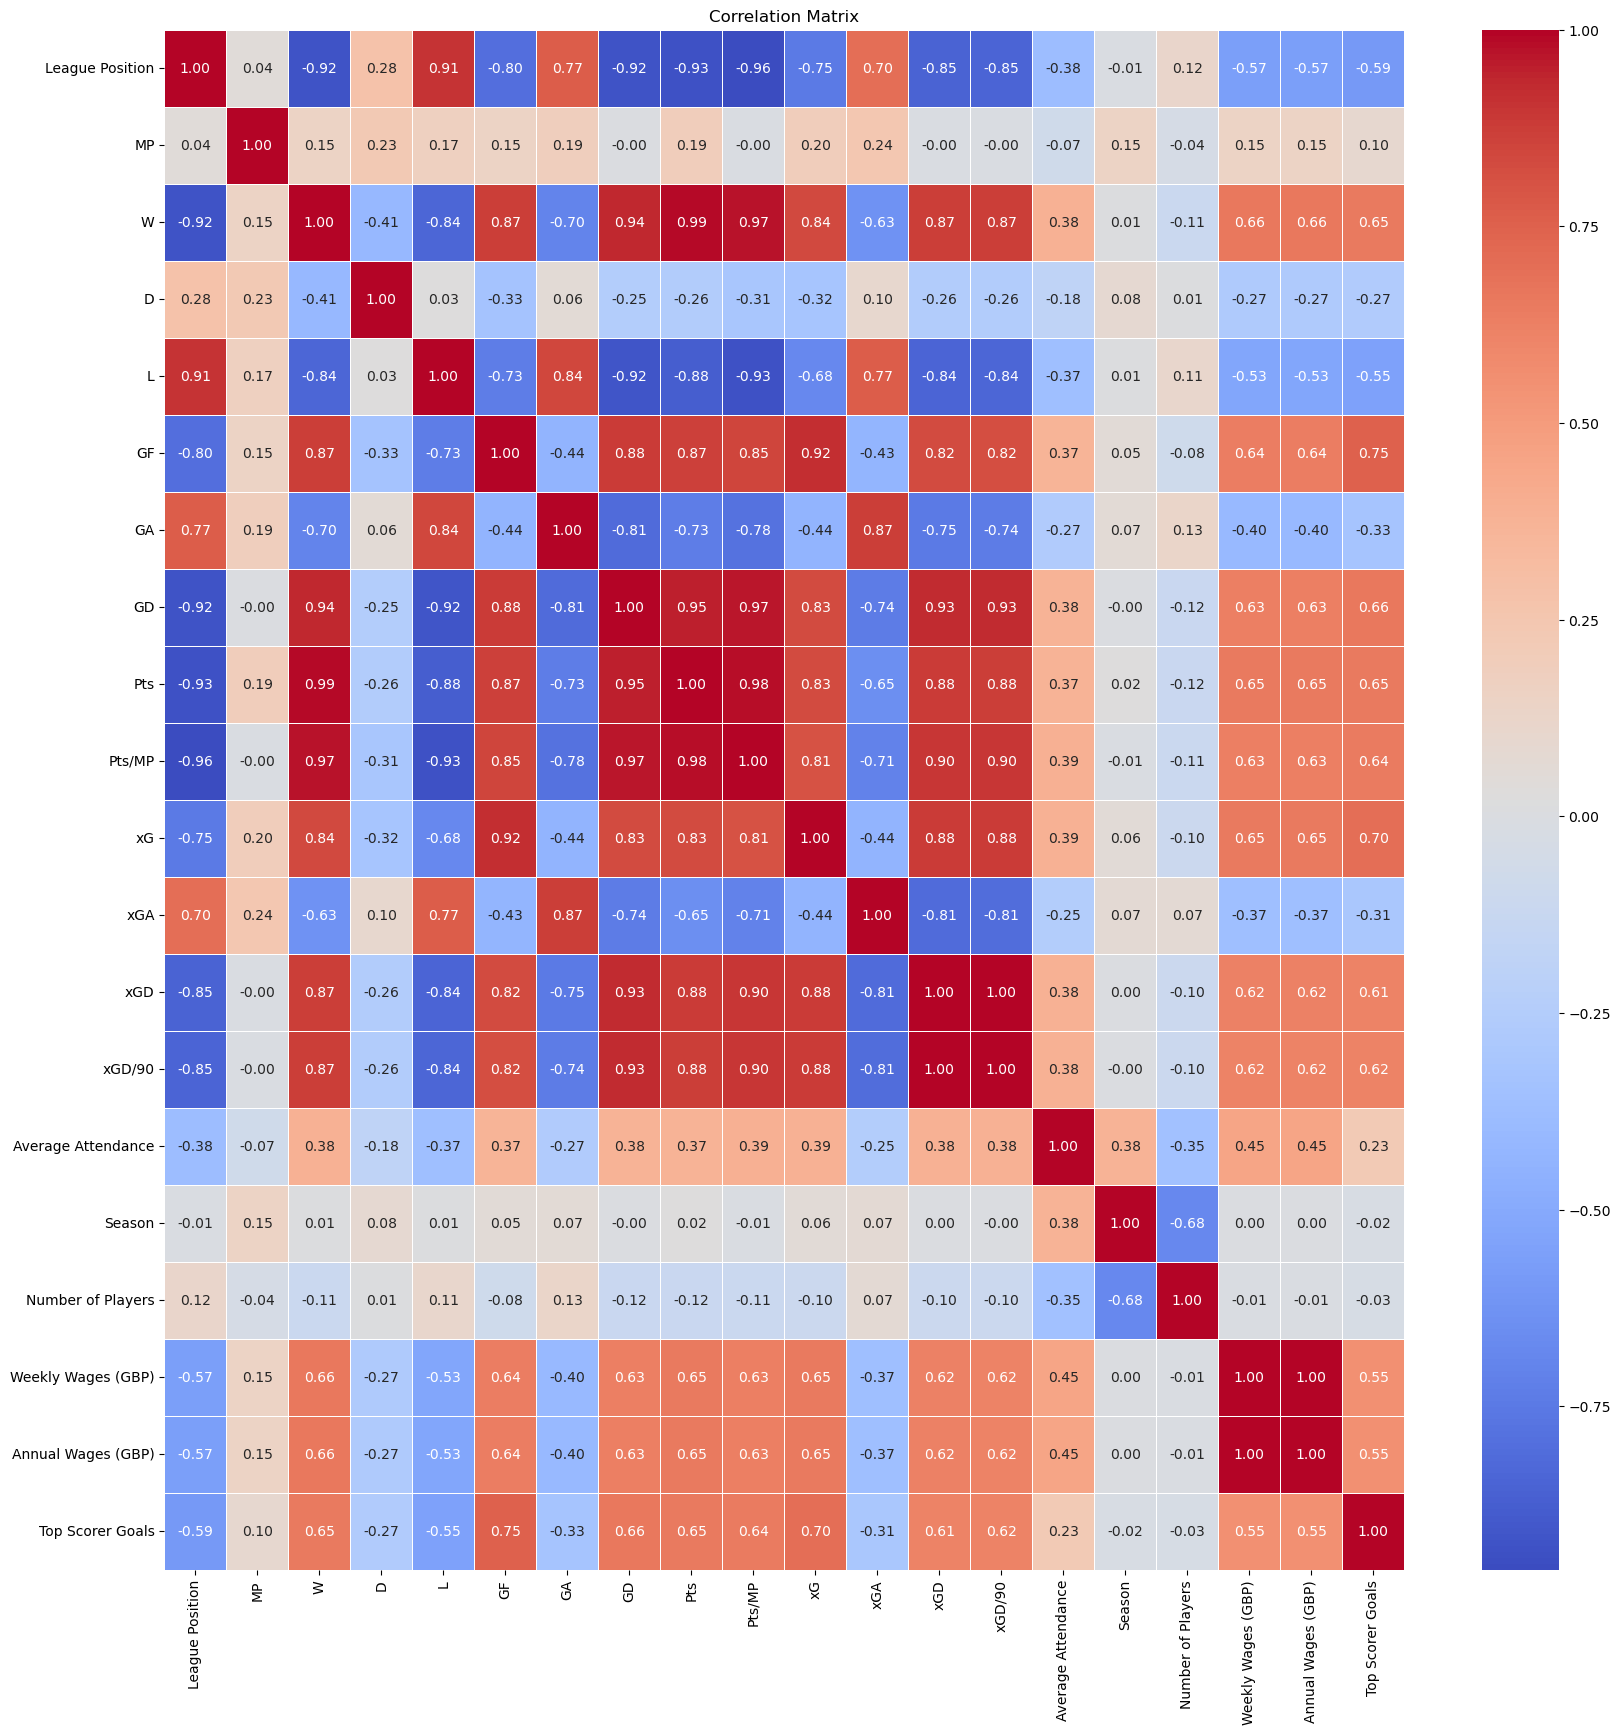

In [17]:
correlation_matrix = df.corr(numeric_only=True)  # Calculate the correlation matrix only for numeric columns

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")

# Export as PNG
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()

### Average Attendance vs League Position

Based on findings from the correlation matrix, it is noted that there is a negative correlation between league position and attendance. Keeping in mind that a lower number for league position is preferable and thus negative correlation is a positive outcome, the following visualisation will seek to investigate this relationship further.

This visualisation will consist of a line plot showing the average attendance by league position for all the leagues mentioned in this report. Since the 2021 season may be regarded as an anomaly in terms of average attendances, it will not be included in this visualisation for accuracy's sake.

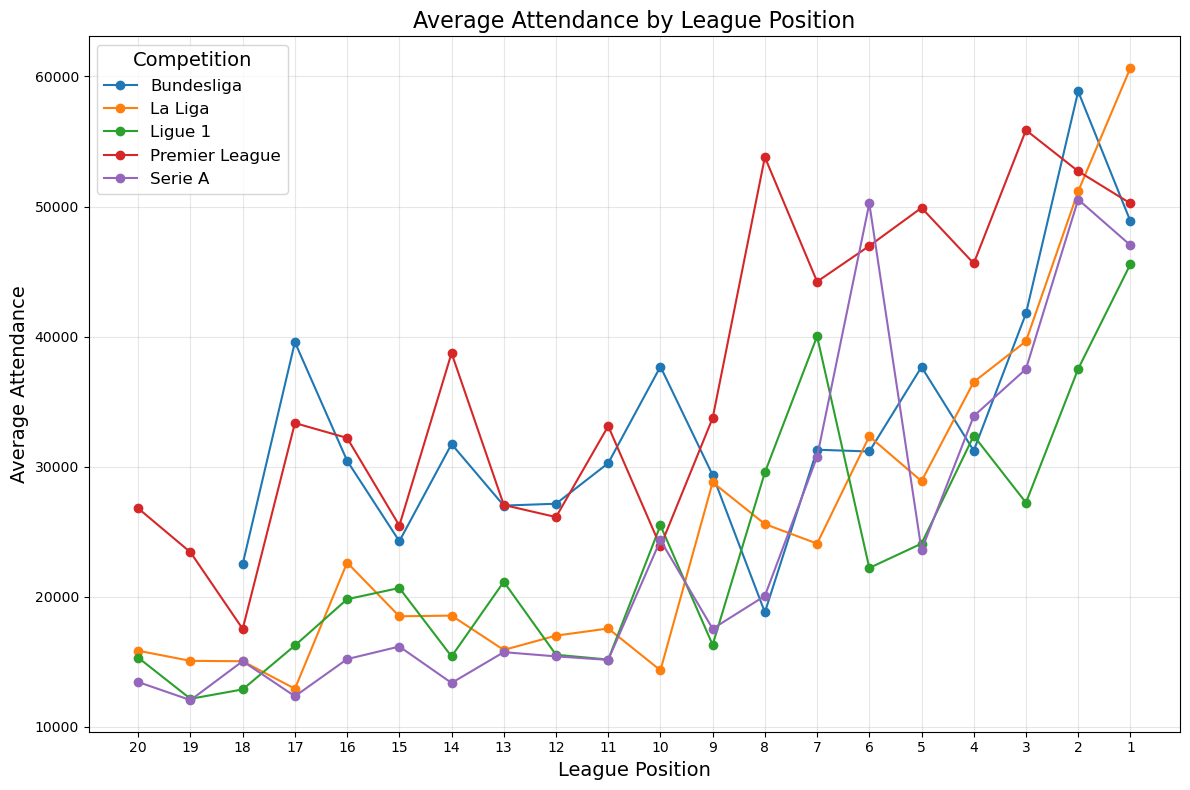

In [18]:
# Exclude data for the 2021 Season
no_2021_df = df[df["Season"] != 2021]

# Calcualate Average Attendance by League Position and Competition
avg_attendance_by_position = no_2021_df.groupby(["League Position", "Competition"])["Average Attendance"].mean().reset_index()

# Set plot size
plt.figure(figsize=(12, 8))

# Get a list of unique competitions
competitions = avg_attendance_by_position["Competition"].unique()

# Loop through each competition and plot its data with a different color
for competition in competitions:
    competition_data = avg_attendance_by_position[avg_attendance_by_position["Competition"] == competition]
    plt.plot(
        competition_data["League Position"],
        competition_data["Average Attendance"],
        marker="o",  # Add markers for clarity
        label=competition  # Label for the legend
    )

# Set chart labels and title
plt.title("Average Attendance by League Position", fontsize=16)
plt.xlabel("League Position", fontsize=14)
plt.ylabel("Average Attendance", fontsize=14)

# Invert x-axis to reflect better league rankings (lower position is better)
plt.gca().invert_xaxis()

# Set x-axis ticks to whole numbers
plt.xticks(range(int(avg_attendance_by_position["League Position"].min()), int(avg_attendance_by_position["League Position"].max()) + 1))

# Add legend
plt.legend(title="Competition", fontsize=12, title_fontsize=14)

# Add grid
plt.grid(alpha=0.3)

# Export plot as PNG
plt.savefig("average_attendance_by_league_position.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

This visualisation shows a distinct relationship between average attendance and league position, with higher attendances being linked to better league performance. There are two possible angles to address this from, the first being that historically successful teams are able to generate greater revenue [11], by way of fan engagements, merchandise sales, sponsorships, broadcasting rights, and tournament prize money, among other factors. This increased revenue allows these teams the luxury to afford better infrastructure, such as bigger stadiums, which in turn leads to greater attendances [12].

The second angle is the argument that greater attendance can lead to better athletic performance, as evidenced in an article by Cross and Uhrig (2022), which states that having no fans reduced the advantages of home teams [13][14]. This lends itself to the idea that teams perform better when more fans attend games.

The purpose of this report, however, is not to discuss the effect of attendance on performance; rather, it is to perform a parallel comparison of these leagues. As the average attendance of these leagues is not apparent from this visual, further analysis will need to be performed to deduce the average attendances across each league.

To achieve this, a simple analysis is conducted to find the average attendance in all 5 leagues, irrespective of league position. For reasons mentioned earlier, the 2021 season will not be considered in this analysis.

In [19]:
# Exclude data for the 2021 Season
no_2021_df = df[df["Season"] != 2021]

# Calculate Average Attendance by League Position and Competition
avg_attendance_by_league = no_2021_df.groupby(["Competition"])["Average Attendance"].mean().reset_index()

# Round the average attendance to the nearest whole number
avg_attendance_by_league["Average Attendance"] = avg_attendance_by_league["Average Attendance"].round(0)

# Sort by highest average attendance
avg_attendance_by_league = avg_attendance_by_league.sort_values(by="Average Attendance", ascending=False).reset_index(drop=True)

# Display the result
avg_attendance_by_league

,Competition,Average Attendance
0,Premier League,37045.0
1,Bundesliga,33324.0
2,La Liga,25562.0
3,Serie A,23981.0
4,Ligue 1,23489.0


The above analysis shows that the average attendance for Premier League games is greater than its nearest competitor in the Bundesliga by roughly 4000. However, it also highlights that in terms of attendance, the Premier League and Bundesliga are much greater than the other three leagues. The first reason for this could be the globalisation of these leagues [15], reaching a wider audience and thus forming a greater base of fans vying to attend games. The second, and likely more significant, reason is stadium sizes. Historically the Bundesliga has boasted greater stadium capacities; however, in the past decade, Premier League teams have pushed to increase stadium capacities, culminating in a large number of stadium expansions and relocations over this time period [16].

### Points required to win each league

This section looks to compare the average points total to beat in order to win the league for each individual competition. For this visualisation, the league position in question is 2 as opposed to 1. This is because the average points total of teams coming in first does not accurately reflect the requirement to win the league in question; it is merely an indication of how many points were accrued on average by title winning teams. This does not take into account the number of points said team has won by and whether those additional points were required. Keeping this in mind, it is worth noting that the points totals specified in this visualisation are an indication of the average number of points a team will need to beat in order to win the league.

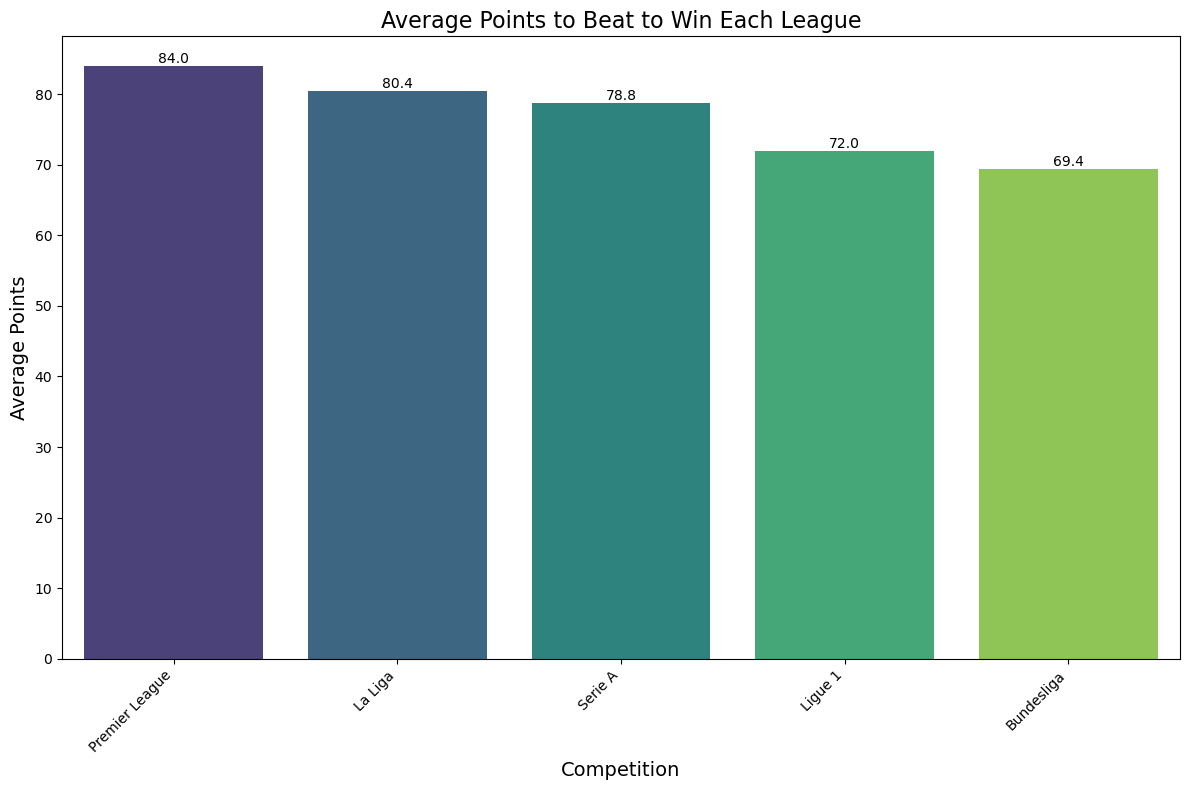

In [20]:
# Filter the data for teams with league position 2
df_position_2 = df[df["League Position"] == 2]

# Calculate the average points by competition
avg_points_by_competition = df_position_2.groupby("Competition")["Pts"].mean().reset_index()

# Sort the data by average points in descending order
avg_points_by_competition = avg_points_by_competition.sort_values(by="Pts", ascending=False)

# Create the bar chart and capture the Axes object
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=avg_points_by_competition,
    x="Competition",
    y="Pts",
    palette="viridis"  # Optional: Change the color palette
)

# Add annotations 
ax.bar_label(ax.containers[0], fmt="%.1f", fontsize=10)

# Set chart labels and title
plt.title("Average Points to Beat to Win Each League", fontsize=16)
plt.xlabel("Competition", fontsize=14)
plt.ylabel("Average Points", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Export plot as PNG
plt.savefig("average_points_to_win_league.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

This visualisation shows that in terms of points, the most difficult league to win is the Premier League, followed by La Liga and Serie A. However, this metric does not do justice to Ligue 1 and the Bundesliga, as the Bundesliga is played over 34 matches [17] as opposed to the top three, which are all played over 38 matches [18][19][20], and Ligue 1 shifted from 38 matches to 34 matches at the conclusion of the 2022/2023 season [21]. As a result of this, taking a sum of the points totals is not a viable metric for comparison. This will be addressed in the following visual.

### Points per Match required to win the league

In order to account for the variation in the number of league games, the average points per match required can be analysed. Once again, this metric will take into account the average for teams finishing in second and, as such, will produce the points per match to beat in order to win the league.

In [21]:
# Calculate the average points per match for each competition/league
avg_pts_per_match = df_position_2.groupby("Competition")["Pts/MP"].mean().reset_index()

# Sort the results by "Pts/MP" in descending order
avg_pts_per_match = avg_pts_per_match.sort_values(by="Pts/MP", ascending=False).reset_index(drop=True)

# Display the sorted results
avg_pts_per_match

,Competition,Pts/MP
0,Premier League,2.210
1,La Liga,2.116
2,Serie A,2.074
3,Ligue 1,2.042
4,Bundesliga,2.042


This analysis provides clear evidence to the idea that the number of points per game required to win the Premier League is greater than that of its rival leagues. While there is no academic research that highlights why this may be the case, multiple articles online point to the influence of Manchester City manager "Pep Guardiola" in raising standards of play in the league [22][23][24].

This analysis can be expanded further to deduce the competitiveness of the leagues in question. This can be done by creating small scatter charts of metrics detailing points per match required for each league position. This will aid in establishing what this project will refer to as "point breaks.". A point break is where the minimum number of points per match attained for a league position is greater than the maximum number of points per match attained for the subsequent position. These can be observed visually on a scatter plot and will appear as breaks in the plot. While this is not a precise science to establish competitiveness for a league, it is one of numerous indicators of this.

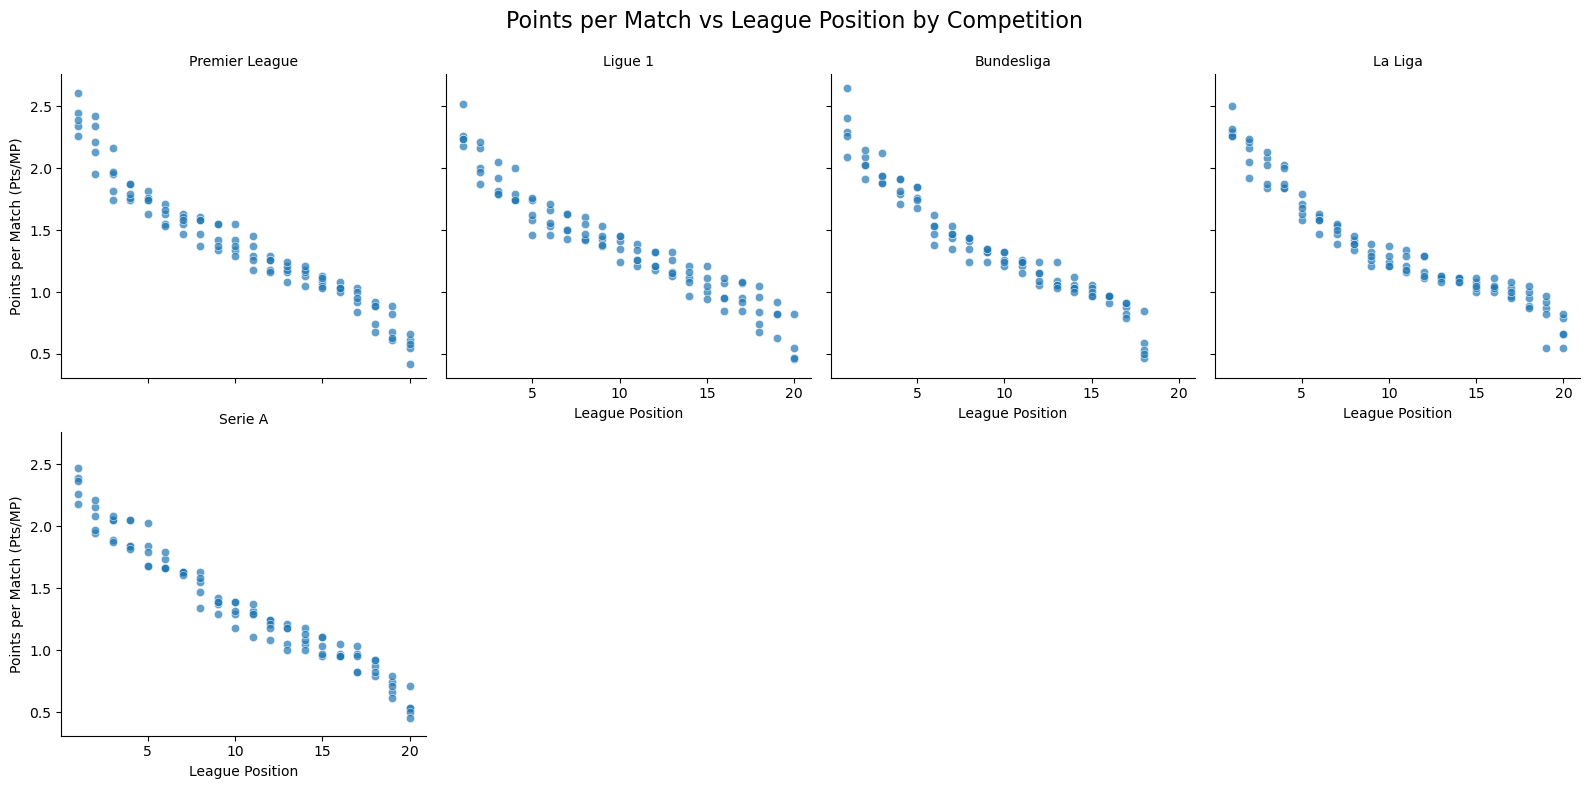

In [22]:
# Create the facet grid based on 'Competition'
g = sns.FacetGrid(df, col="Competition", col_wrap=4, height=4)  # Adjust col_wrap for number of charts per row

# Map the scatter plot to the facet grid
g.map(sns.scatterplot, "League Position", "Pts/MP", alpha=0.7)

# Set chart labels and title
g.set_axis_labels("League Position", "Points per Match (Pts/MP)")
g.set_titles(col_template="{col_name}")  # Title each chart with the competition name

# Adjust the layout and add a main title
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Points per Match vs League Position by Competition", fontsize=16)

# Export plot as PNG
plt.savefig("pts_per_match_vs_position.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

The general shape of each scatter plot is the same; however, there are two point breaks observed in the visual. One is in the Bundesliga, between positions 5 and 6; the other is in La Liga, between positions 4 and 5. This observation lends itself to the idea that there is a disproportionate gap between the teams on either side of this disjoint. This chasm is likely created by a disproportionate distribution of resources between the top teams and the rest.

Upon further investigation, an interesting insight is uncovered. The top five teams in the Bundesliga qualify for the Champions League, and the top four teams in La Liga qualify for the same tournament. The Champions League is the premier European tournament, considered to be the biggest club competition in the world. With qualification comes a large revenue windfall [25], owed to the extensive viewership of the competition. Teams earn an incredible amount of money just for qualifying for this tournament. While the same can be said for the Premier League, prize pools for this competition are considerably higher than that of its rivals [25][26][27][28][29][30]; as such, this revenue may offset the imbalance associated with Champions League related revenue.

### Goals required to win the each league

This report has already discussed the points required per match in order to win each league; now it will look to investigate what is required to win those points in terms of goals scored. The following section will look to analyse and visualise the number of goals required to win each respective league, broken down by point and by match.

In [23]:
# Group by competition  and calculate total goals scored  and total points
goals_per_point = df.groupby("Competition").agg(
    total_goals=("GF", "sum"),
    total_points=("Pts", "sum")
).reset_index()

# Calculate goals scored per point
goals_per_point["Goals per Point"] = goals_per_point["total_goals"] / goals_per_point["total_points"]

# Sort by Goals per Point
goals_per_point = goals_per_point.sort_values(by="Goals per Point", ascending=False).reset_index(drop=True)

# Merge the dataframes on 'Competition' (the key for merging)
data = pd.merge(goals_per_point, avg_pts_per_match, on="Competition")
data = pd.merge(data, avg_points_by_competition, on = "Competition")

# Calculate Goals per Match to Win
data["Goals to Win League"] = data["Goals per Point"] * data["Pts"]
data["Goals per Match to Win League"] = data["Goals per Point"] * data["Pts/MP"]

# Display results
data

,Competition,total_goals,total_points,Goals per Point,Pts/MP,Pts,Goals to Win League,Goals per Match to Win League
0,Bundesliga,4820,4212,1.144349,2.042,69.4,79.417854,2.336762
1,Premier League,5459,5258,1.038227,2.210,84.0,87.211107,2.294483
2,Serie A,5372,5199,1.033276,2.074,78.8,81.422120,2.143014
3,Ligue 1,4713,4732,0.995985,2.042,72.0,71.710904,2.033801
4,La Liga,4806,5179,0.927978,2.116,80.4,74.609461,1.963602


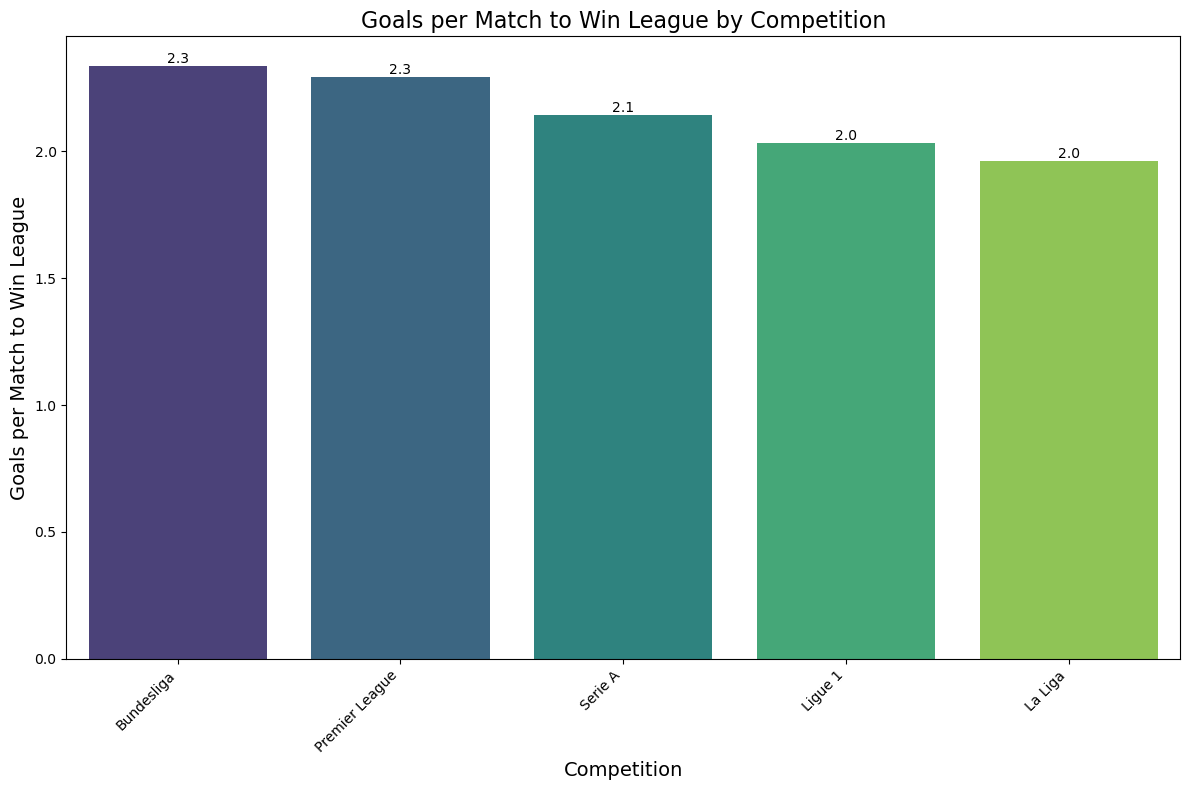

In [24]:
# Create a bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=data, x="Competition", y="Goals per Match to Win League", palette="viridis")

# Add labels and title
plt.title("Goals per Match to Win League by Competition", fontsize=16)
plt.xlabel("Competition", fontsize=14)
plt.ylabel("Goals per Match to Win League", fontsize=14)

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45, ha="right")

# Add annotations 
ax.bar_label(ax.containers[0], fmt="%.1f", fontsize=10)

# Export plot as PNG
plt.savefig("goals_per_match_required.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

This visual shows that the amount of effort (measured by the number of goals) required to win enough points and matches to win each league is greater in the Premier League and Bundesliga than that of the other top five European leagues. However, according to a 2019 article by Mitrotasios et al., [31] the demand for goals scored is less of a metric for competitiveness and more an indicator of the different football cultures of each country. However, relating this to the original question posed for this report, which is, which competition is best, there is an argument to be made for a higher number of goals per match increasing fan engagement, and in that respect, the Premier League and Bundesliga come out on top. 

### Player wages analysis

The final segment of this analysis will investigate how player wages compare across the leagues. Beginning with a comparison of weekly player wages by league position.

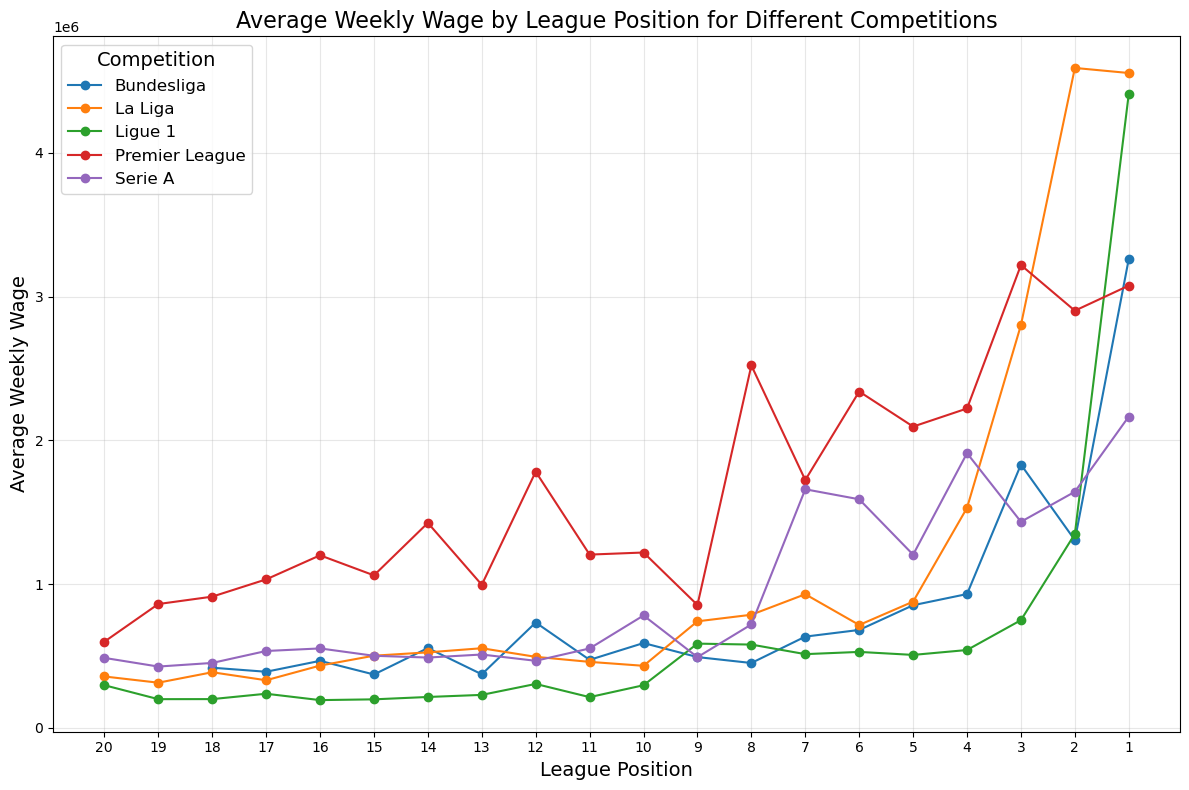

In [25]:
# Group by league position and competition to calculate the average attendance
avg_wage_by_position = df.groupby(["League Position", "Competition"])["Weekly Wages (GBP)"].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))

# Get a list of unique competitions
competitions = avg_wage_by_position["Competition"].unique()

# Loop through each competition and plot its data with a different color
for competition in competitions:
    competition_data = avg_wage_by_position[avg_wage_by_position["Competition"] == competition]
    plt.plot(
        competition_data["League Position"],
        competition_data["Weekly Wages (GBP)"],
        marker="o",  # Optional: Add markers for clarity
        label=competition  # Label for the legend
    )

# Set chart labels and title
plt.title("Average Weekly Wage by League Position for Different Competitions", fontsize=16)
plt.xlabel("League Position", fontsize=14)
plt.ylabel("Average Weekly Wage", fontsize=14)

# Invert x-axis to reflect better league rankings (lower position is better)
plt.gca().invert_xaxis()

# Set x-axis ticks to whole numbers
plt.xticks(range(int(avg_attendance_by_position["League Position"].min()), int(avg_attendance_by_position["League Position"].max()) + 1))

# Add legend
plt.legend(title="Competition", fontsize=12, title_fontsize=14)

# Add grid
plt.grid(alpha=0.3)

# Export plot as PNG
plt.savefig("wage_by_league_position.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.tight_layout()
plt.show()

One immediately observable trend is that Premier League player wages are the highest for every position, up until the top two. For second place, the Premier League is surpassed by La Liga, and for first, it is behind La Liga, Ligue 1, and the Bundesliga, respectively. This provides an interesting insight into the competitiveness of these leagues, whereby teams towards the top of other leagues are able to pay players substantially higher wages than other teams in the same league; this financial inequality leads to a decrease in the competitiveness of said leagues. A key reason for this issue is the disparity in the financial capabilites of club owners in these leagues.

The next part of this analysis will provide a direct comparison of the average annual wages spent per point won in each of the five leagues, to investigate what is required financially for clubs to compete in these leagues.

In [26]:
# Grouping by 'Competition' to calculate the total annual wages and total points by league
league_wages_points = df.groupby('Competition').agg(
    total_annual_wages=('Annual Wages (GBP)', 'sum'),
    total_points=('Pts', 'sum')
).reset_index()

# Calculate the average amount of annual wage spent per point by dividing total wages by total points divide result by 1,000,000 to produce result in millions
league_wages_points['Wages per Point (in millions)'] = (league_wages_points['total_annual_wages'] / league_wages_points['total_points']) / 1000000

# Sort the data by 'Wages per Point (in millions)' in descending order
league_wages_points = league_wages_points.sort_values(by='Wages per Point (in millions)', ascending=False)

# Display the results
print(league_wages_points[['Competition', 'Wages per Point (in millions)']])

      Competition  Wages per Point (in millions)
3  Premier League                       1.644306
1         La Liga                       1.120715
4         Serie A                       0.929030
0      Bundesliga                       0.914661
2         Ligue 1                       0.673452


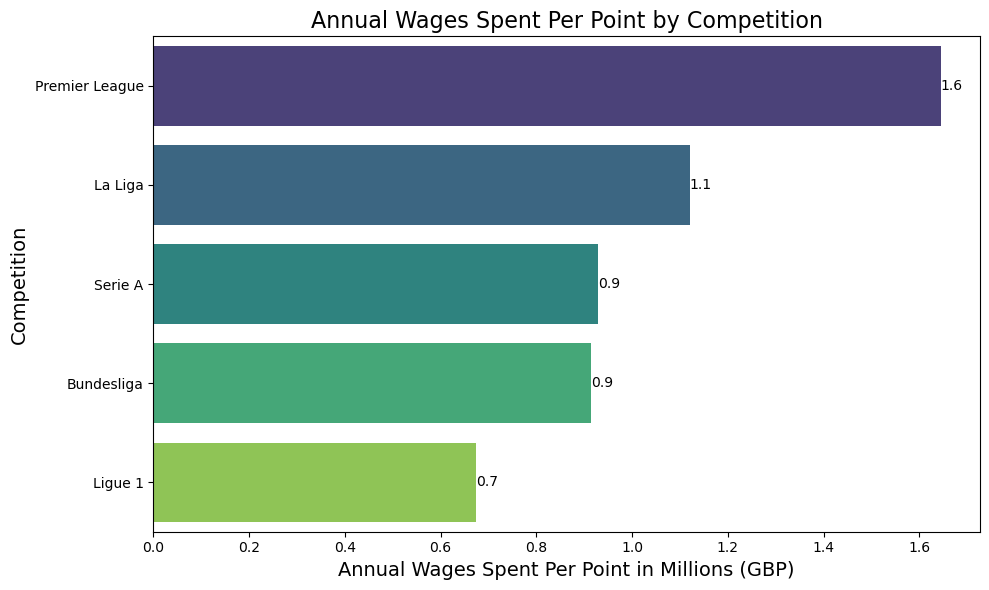

In [27]:
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=league_wages_points,
    x='Wages per Point (in millions)',
    y='Competition',
    palette='viridis'  # You can choose a different color palette if you prefer
)

# Add annotations 
ax.bar_label(ax.containers[0], fmt="%.1f", fontsize=10)

# Set chart labels and title
plt.title("Annual Wages Spent Per Point by Competition", fontsize=16)
plt.xlabel("Annual Wages Spent Per Point in Millions (GBP)", fontsize=14)
plt.ylabel("Competition", fontsize=14)

# Export plot as PNG
plt.savefig("wages_per_point.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.tight_layout()
plt.show()

This analysis and subsequent visualisation show the gulf in amount spent per point between the Premier League and others. A key reason for this might be the overall financial capabilities of clubs in each league. This report has already discussed the fact that tournament prize pools in the Premier League are considerably higher than its rivals. Upon further research, it can be observed that money from broadcasting rights for Premier League teams is also greater, with teams closer to the bottom of the Premier League earning more in TV revenue than some of the top teams in other leagues [32]. In these terms, as Premier League clubs are generally wealthier and can afford to pay higher wages, it is not difficult to understand why then that the net spend per point in this league is also higher than others.

## Conclusion

In conclusion, this report found that the average attendance of matches in the Premier League and Bundesliga is the highest out of the top five European leagues, owed to the global reach of these leagues [15] and stadium capacities of clubs [16]. 

The sum of points required to win each league is greatest in the Premier League and La Liga, although due to the varying number of matches played in each league, this is not a suitable metric to compare these leagues by.

The number of points per match required to win each league is highest in the Premier League, and whilst there is no academic research to provide evidence as to the reasons for this, Manchester City manager "Pep Guardiola" is often credited as having a big influence on this trend [22][23][24].

The number of goals required per match to win each league is highest in the Bundesliga and Premier League; however, this factor is strongly related to the footballing culture of these countries.

There is a large disparity in player wage spending between teams in La Liga, Ligue 1, and the Bundesliga, raising questions around the competitiveness of these leagues.

The required player wages to win the league are greatest in the Premier League, largely due to the overall wealth of the league, its clubs, and the distribution of resources throughout the Premier League.

Considering the factors investigated in this report, it would appear that the Premier League and Bundesliga are currently the 'best' European leagues, with the Premier League slightly ahead by most metrics. This result also inadvertently shed light on a clear correlation between revenue and performance, as stated in a 2017 article by Rohde and Breuer; these were the only two big European leagues to turn a profit in the 2013/2014 season. 

Improvements to this report could be achieved by:

1. Comparing goal difference required per match instead of goals scored, to account for varying football cultures.

2. Analyse the unique number of teams appearing in the top five positions of these leagues as a metric for competitiveness.

3. As the question posed by this report is more complex than just the factors previously discussed, with more time, it would be preferable to obtain more data on these clubs and leagues to provide a more complete picture.

This project provides a foundation for understanding what is required by teams to win these leagues and thus, what is required by leagues to improve their overall standing in world football. It could be expanded further by factoring in more data to help teams and leagues in their endeavours towards success.

## References

[1] UK Government (2014). Exceptions to Copyright. [online] GOV.UK. Available at: https://www.gov.uk/guidance/exceptions-to-copyright#non-commercial-research-and-private-study. <br>
[2] Sandy (2017). Is Screen Scraping and Web Crawling Legal in the UK? [online] Paris Smith. Available at: https://parissmith.co.uk/blog/web-crawling-screen-scraping-legal-position/. <br>
[3] oxylabs.io. (2024). Is Web Scraping Legal? [online] Available at: https://oxylabs.io/blog/is-web-scraping-legal. <br>
[4] www.rocketlawyer.com. (2024). Data Mining and Data Scraping. [online] Available at: https://www.rocketlawyer.com/gb/en/business/data-protection-for-businesses/legal-guide/data-mining-and-data-scraping. <br>
[5] Sports-Reference.com. (2022). Bot/Scraping/Crawler Traffic on Sports-Reference.com Sites. [online] Available at: https://www.sports-reference.com/bot-traffic.html. <br>
[6] Premier League (2020). How has the COVID-19 pandemic affected Premier League matches? [online] www.premierleague.com. Available at: https://www.premierleague.com/news/1682374.<br>
[7] The Stadium Business. (2021). Bundesliga clubs suffer revenue loss during COVID-hit season. [online] Available at: https://www.thestadiumbusiness.com/2021/03/09/bundesliga-clubs-suffer-revenue-loss-during-covid-hit-season/. <br>
[8] Kirkland, A. and Faez, R. (2020). La Liga clubs told no fans for matches in Spain until 2021 - sources - ESPN. [online] ESPN.com. Available at: https://www.espn.co.uk/football/story/_/id/37583107/la-liga-clubs-told-no-fans-matches-spain-2021-sources [Accessed 25 Dec. 2024].<br>
[9] Giacomo Galardini (2021). Serie A 2020/2021 Season Review: Winners And Losers Of A Unique Campaign. Forbes. [online] 24 May. Available at: https://www.forbes.com/sites/giacomogalardini/2021/05/24/serie-a-20202021-season-review-winners-and-losers-of-a-unique-campaign/.<br>
[10] Rial, B. (2022). Pandemic leads to 95% drop-off in ticket sales for Ligue 1 clubs. [online] The Stadium Business. Available at: https://www.thestadiumbusiness.com/2022/05/09/pandemic-leads-to-95-drop-off-in-ticket-sales-for-ligue-1-clubs/ [Accessed 25 Dec. 2024].<br>
[11] Aguiar-Noury, A. and Garcia-del-Barrio, P. (2022). Performance and Revenues in European Football: clubs’ Media Visibility and Brand Value. International Journal of the Economics of Business, 29(3), pp.1–28. doi:https://doi.org/10.1080/13571516.2022.2095889.<br>
[12] Leeds, M.A., von Allmen, P. and Matheson, V.A. (2018). The Economics of Sports. Routledge. doi:https://doi.org/10.4324/9781315167947.<br>
[13] Cross, J. and Uhrig, R. (2022). Do Fans Impact Sports Outcomes? A COVID-19 Natural Experiment. Journal of Sports Economics, 24(1), p.152700252211002. doi:https://doi.org/10.1177/15270025221100204.<br>
[14] Ferraresi, M. and Gucciardi, G. (2020). Team Performance and Audience: Experimental Evidence from the Football Sector. [online] Available at: https://www.siepweb.it/siep/wp/wp-content/uploads/repec/1598698776Ferraresi_Gucciardi_WP_SIEP_760.pdf.<br>
[15] Smith, A. (2023). Future of Football: Attendances on the rise... but how big could stadiums actually get? [online] Sky Sports. Available at: https://www.skysports.com/football/news/11095/12896864/future-of-football-attendances-on-the-rise-but-how-big-could-stadiums-actually-get. <br>
[16] Consultancy.uk (2017). Premier League continues stadium expansion to chase Bundesliga attendance levels. [online] Consultancy.uk. Available at: https://www.consultancy.uk/news/13828/premier-league-continues-stadium-expansion-to-chase-bundesliga-attendance-levels.<br>
[17] Bundesliga (2024). How the Bundesliga fixture list is made. [online] Bundesliga.com. Available at: https://www.bundesliga.com/en/bundesliga/news/how-the-bundesliga-fixture-list-is-made-20316.<br>
[18] Al Jazeera Staff (2024). English Premier League 2024-25: Match schedule, start times, teams, format. [online] Al Jazeera. Available at: https://www.aljazeera.com/sports/2024/8/15/english-premier-league-2024-25-match-schedule-start-times-teams. <br>
[19] FIFPlay (n.d.). LaLiga Competition Format. [online] FIFPlay. Available at: https://www.fifplay.com/laliga-format/. <br>
[20] Serie A (2023). How does the Italian Serie A league format work? [online] seriea.co.uk: Serie A News In English 24/7. Available at: https://seriea.co.uk/how-does-the-italian-serie-a-league-format-work/. <br>
[21] Sky Sports (2021). Ligue 1: French top tier reduced to 18 teams from 2023/24 season. [online] Sky Sports. Available at: https://www.skysports.com/football/news/11800/12324041/ligue-1-french-top-tier-reduced-to-18-teams-from-2023-24-season.<br>
[22] Reid, J. (2024). The Boar. [online] Theboar.org. Available at: https://theboar.org/2024/07/opinion-guardiolas-influence-has-silenced-traditional-english-football/.  <br>
[23] Titans Football (2024). Mastering Pep Guardiola Tactic: The Key to Football Success. [online] Titans Football. Available at: https://thetitansfa.com/mastering-pep-guardiola-tactic-the-key-to-football-success/. <br>
[24] Yanga Sibembe (2024). The impact of Pep Guardiola’s tactical influence will reverberate long after he has ended his career. [online] Daily Maverick. Available at: https://www.dailymaverick.co.za/article/2024-09-29-the-striking-impact-of-pep-guardiolas-influence-will-reverberate-long-after-he-has-ended-his-storied-career/.<br>
[25] Evans, N. (2023). UEFA Champions League prize money breakdown 2023/24: How much will winners get? | Sporting News United Kingdom. [online] www.sportingnews.com. Available at: https://www.sportingnews.com/uk/football/news/champions-league-prize-money-breakdown-ucl-winners-uefa/6e9cd9ee671ddd07fc6507ff. <br>
[26] Yahoo Sports (2024). Premier League prize money: How much clubs make per position. [online] Yahoo Sports. Available at: https://sports.yahoo.com/premier-league-prize-money-much-230000732.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAABYB65XI7gz9oV8z1D6HE6j_lNtSYksMLi4uQeL-wbpKQHVTp8lMVrdCekUmEKZYfhLifYBKP0Qvib8sS2mGiq5MnG-a86xt3BcRe_HQ96Xb1gVC762rOtUMR3bAr0Jf16nq2kPaSWUmJFNfwhuD06t7CBRHvzv1erueLSqXrRx7. <br>
[27] Mirror Review (2022). Top 10 Highest Prize Money in Football League Competitions: Who Pays the Most? [online] Mirror Review. Available at: https://www.mirrorreview.com/highest-prize-money-in-football-league/. <br>
[28] Lincoln (2024). Bundesliga Prize Money Distribution 2024-25 (Breakdown). [online] GoalTheBall. Available at: https://goaltheball.com/bundesliga-prize-money/. <br>
[29] Bettoni, L. (2021). Serie A prize money revealed. [online] Football Italia. Available at: https://football-italia.net/serie-a-prize-money-revealed-2/.<br>
[30] Madrid, M. (2023). La Liga prize money for the 2022 - 2023 season. [online] Managing Madrid. Available at: https://www.managingmadrid.com/2023/6/5/23749313/la-liga-prize-money-for-the-2022-2023-season. <br>
[31] Mitrotasios, M., Gonzalez-Rodenas, J., Armatas, V. and Aranda, R. (2019). The creation of goal scoring opportunities in professional soccer. Tactical differences between Spanish La Liga, English Premier League, German Bundesliga and Italian Serie A. International Journal of Performance Analysis in Sport, 19(3), pp.452–465. doi:https://doi.org/10.1080/24748668.2019.1618568.<br>
[32] Geey, D. (n.d.). Football Broadcasting Deals Across the Top 5 European Leagues. [online] DANIEL GEEY. Available at: https://www.danielgeey.com/done-deal-blog/football-broadcasting-deals-across-the-top-5-european-leagues. <br>
[33] Rohde, M. and Breuer, C. (2017). The market for football club investors: a review of theory and empirical evidence from professional European football. European Sport Management Quarterly, [online] 17(3), pp.265–289. doi:https://doi.org/10.1080/16184742.2017.1279203.

## Bibliography

1. Python Software Foundation (2019). 3.7.3 Documentation. [online] Python.org. Available at: https://docs.python.org/3/.
2. Richardson, L. (2019). beautifulsoup4. [online] PyPI. Available at: https://pypi.org/project/beautifulsoup4/.
3. Pandas (2024). pandas documentation — pandas 1.0.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/.
4. Matplotlib (2024). Matplotlib: Python plotting — Matplotlib 3.3.4 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/index.html.
5. Seaborn (2012). seaborn: statistical data visualization — seaborn 0.9.0 documentation. [online] Pydata.org. Available at: https://seaborn.pydata.org/.